# Multiple Factor Analysis (MFA)

In [1]:
#changement de dossier
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des données
import pandas as pd
url = "http://factominer.free.fr/factomethods/datasets/wine.txt"
wine = pd.read_table(url,sep="\t")
display(wine)

,Label,Soil,Odor.Intensity.before.shaking,Aroma.quality.before.shaking,Fruity.before.shaking,Flower.before.shaking,Spice.before.shaking,Visual.intensity,Nuance,Surface.feeling,...,Acidity,Astringency,Alcohol,Balance,Smooth,Bitterness,Intensity,Harmony,Overall.quality,Typical
2EL,Saumur,Env1,3.074,3.000,2.714,2.280,1.960,4.321,4.000,3.269,...,2.107,2.429,2.500,3.250,2.731,1.926,2.857,3.143,3.393,3.250
1CHA,Saumur,Env1,2.964,2.821,2.375,2.280,1.680,3.222,3.000,2.808,...,2.107,2.179,2.654,2.926,2.500,1.926,2.893,2.964,3.214,3.036
1FON,Bourgueuil,Env1,2.857,2.929,2.560,1.960,2.077,3.536,3.393,3.000,...,2.179,2.250,2.643,3.321,2.679,2.000,3.074,3.143,3.536,3.179
1VAU,Chinon,Env2,2.808,2.593,2.417,1.913,2.160,2.893,2.786,2.538,...,3.179,2.185,2.500,2.333,1.680,1.963,2.462,2.038,2.464,2.250
1DAM,Saumur,Reference,3.607,3.429,3.154,2.154,2.040,4.393,4.036,3.385,...,2.571,2.536,2.786,3.464,3.036,2.071,3.643,3.643,3.741,3.444
2BOU,Bourgueuil,Reference,2.857,3.111,2.577,2.040,2.077,4.464,4.259,3.407,...,2.393,2.643,2.857,3.286,2.857,2.179,3.464,3.500,3.643,3.393
1BOI,Bourgueuil,Reference,3.214,3.222,2.962,2.115,2.040,4.143,3.929,3.250,...,2.607,2.607,2.778,3.464,2.857,1.929,3.643,3.556,3.714,3.357
3EL,Saumur,Env1,3.120,2.852,2.500,2.200,2.185,4.214,3.857,3.077,...,2.179,2.630,2.778,3.179,2.786,2.000,3.321,3.296,3.393,3.071
DOM1,Chinon,Env1,2.857,2.815,2.808,1.923,2.074,4.037,3.893,3.280,...,2.286,2.407,2.741,3.143,2.821,1.964,3.148,3.286,3.200,3.500
1TUR,Saumur,Env2,2.893,3.000,2.571,1.846,1.680,3.704,3.407,3.111,...,2.357,2.250,2.704,3.214,2.500,2.185,2.857,2.963,3.179,2.964


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Label                          21 non-null     object 
 1   Soil                           21 non-null     object 
 2   Odor.Intensity.before.shaking  21 non-null     float64
 3   Aroma.quality.before.shaking   21 non-null     float64
 4   Fruity.before.shaking          21 non-null     float64
 5   Flower.before.shaking          21 non-null     float64
 6   Spice.before.shaking           21 non-null     float64
 7   Visual.intensity               21 non-null     float64
 8   Nuance                         21 non-null     float64
 9   Surface.feeling                21 non-null     float64
 10  Odor.Intensity                 21 non-null     float64
 11  Quality.of.odour               21 non-null     float64
 12  Fruity                         21 non-null     float

Pour réaliser un analyse factorielle multiple avec scientisttools, nous devons effectuer un traitement de notre jeu de données

### MFA

In [3]:
wine2 = pd.DataFrame(data=wine.values,
                     columns = pd.MultiIndex.from_tuples(
    [
        ("others","Label"),
        ("others","Soil"),
        ("before shaking","Odor.Intensity"),
        ("before shaking","Aroma.quality"),
        ("before shaking","Fruity"),
        ("before shaking","Flower"),
        ("before shaking","Spice"),
        ("vision","Visual.intensity"),
        ("vision","Nuance"),
        ("vision","Surface.feeling"),
        ("after shaking","Odor.intensity"),
        ("after shaking","Quality.of.odour"),
        ("after shaking","Fruity"),
        ("after shaking","Flower"),
        ("after shaking","Spice"),
        ("after shaking","Plante"),
        ("after shaking","Phenolic"),
        ("after shaking","Aroma.intensity"),
        ("after shaking","Aroma.persistency"),
        ("after shaking","Aroma.quality"),
        ("gustation","Attack.intensity"),
        ("gustation","Acidity"),
        ("gustation","Astringency"),
        ("gustation","Alcohol"),
        ("gustation","Balance"),
        ("gustation","Smooth"),
        ("gustation","Bitterness"),
        ("gustation","Intensity"),
        ("gustation","Harmony"),
        ("overall judgement","Overall.quality"),
        ("overall judgement","Typical")
    ]
))
wine2.index= wine.index

In [4]:
groups = wine2.columns.levels[0].drop(["others","overall judgement"]).tolist()
groups

['after shaking', 'before shaking', 'gustation', 'vision']

In [5]:
for g in groups:
    wine2[g] = wine2[g].astype("float")
wine2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2EL  to T2  
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   (others, Label)                       21 non-null     object 
 1   (others, Soil)                        21 non-null     object 
 2   (before shaking, Odor.Intensity)      21 non-null     float64
 3   (before shaking, Aroma.quality)       21 non-null     float64
 4   (before shaking, Fruity)              21 non-null     float64
 5   (before shaking, Flower)              21 non-null     float64
 6   (before shaking, Spice)               21 non-null     float64
 7   (vision, Visual.intensity)            21 non-null     float64
 8   (vision, Nuance)                      21 non-null     float64
 9   (vision, Surface.feeling)             21 non-null     float64
 10  (after shaking, Odor.intensity)       21 non-null     float64
 11  (after shaking, Quali

In [6]:
from scientisttools.decomposition import MFA

mfa = MFA(n_components=6,
          groups=groups,
          groups_sup=["others","overall judgement"],
          row_labels=wine2.index,
          parallelize=True)
# Instanciation
mfa.fit(wine2)

      after shaking                                                           \
     Odor.intensity Quality.of.odour    Fruity    Flower     Spice    Plante   
2EL        0.027727         0.149700  0.080741  0.494912 -0.774944  0.102828   
1CHA      -0.059494        -0.502766 -0.612416  0.871135 -1.006282  0.102828   
1FON      -0.342374        -0.653173 -0.166662  0.093608  0.164151 -0.619860   
1VAU      -0.554533        -0.756974 -0.972858 -0.248128 -0.025959  0.981618   
1DAM       0.331822         0.259857  0.667259  0.215880 -0.069478 -0.585171   
2BOU      -0.509744         0.312817 -0.100546  0.244097 -0.069478 -0.619860   
1BOI       0.079588         0.556432  0.407059  0.118689  0.473365 -0.400163   
3EL        0.609986        -0.339650 -0.697728  0.494912  0.608503  0.334089   
DOM1      -0.090140         0.230199  0.326013 -0.382941 -0.122159 -0.258516   
1TUR      -0.408379         0.045899  0.168186 -0.382941 -0.312268  0.102828   
4EL        0.499192         0.312817  0.

MFA(groups=['after shaking', 'before shaking', 'gustation', 'vision'],
    groups_sup=['others', 'overall judgement'], n_components=6,
    parallelize=True,
    row_labels=Index(['2EL ', '1CHA', '1FON', '1VAU', '1DAM', '2BOU', '1BOI', '3EL ', 'DOM1',
       '1TUR', '4EL ', 'PER1', '2DAM', '1POY', '1ING', '1BEN', '2BEA', '1ROC',
       '2ING', 'T1  ', 'T2  '],
      dtype='object'))

In [7]:
# Valeurs propres
from scientisttools.extractfactor import get_eig
eig = get_eig(mfa)
display(eig)

,eigenvalue,difference,proportion,cumulative
Dim.1,3.461950,2.095182,49.378382,49.378382
Dim.2,1.366768,0.751339,19.494446,68.872829
Dim.3,0.615429,0.243229,8.777969,77.650797
Dim.4,0.372200,0.101817,5.308747,82.959544
Dim.5,0.270382,0.067979,3.856511,86.816055
Dim.6,0.202403,0.026690,2.886912,89.702967


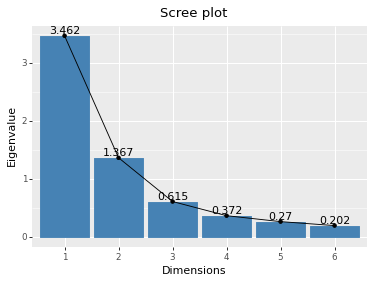

In [8]:
# Scree plot - eigenvalue
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(mfa,choice="eigenvalue",add_labels=True)
print(p)

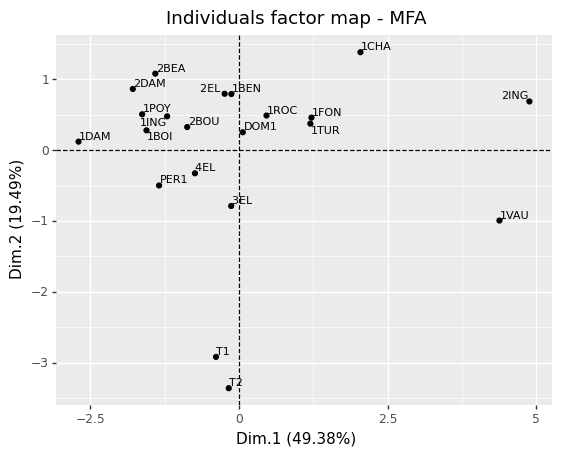

In [9]:
from scientisttools.ggplot import fviz_mfa_ind
p = fviz_mfa_ind(mfa,
                 repel=True,
                 color="black")
print(p)

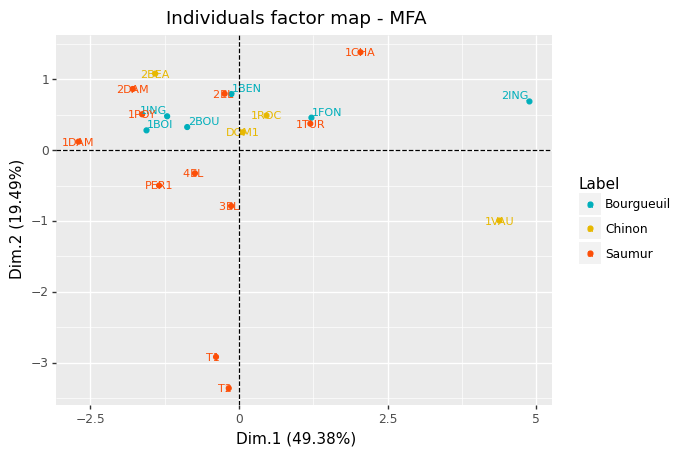

In [10]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 habillage="Label", # color by groups 
                 palette = ("#00AFBB", "#E7B800", "#FC4E07"),
                 add_ellipse=False)
print(p)

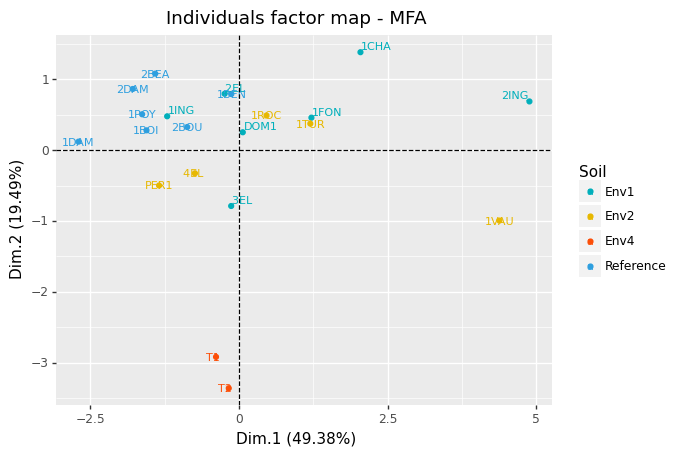

In [11]:
p = fviz_mfa_ind(mfa,
                 repel=True,
                 habillage="Soil", # color by groups 
                 palette = ("#00AFBB", "#E7B800", "#FC4E07","#2E9FDF"),
                 add_ellipse=False)
print(p)

In [12]:
mfa.row_coord_partial_

group     after shaking                                               \
component            0          1          2          3           4    
2EL           -4.033219  24.264257 -19.569911  38.511098   19.151105   
1CHA          23.923176  22.433070 -51.748714   2.426158  -65.021477   
1FON          15.097023  13.613459   4.826266 -77.408814 -113.816487   
1VAU          53.434301 -41.157332 -21.022754 -21.507186   28.125222   
1DAM         -33.634471  26.359487   7.670916  20.911082  -22.218992   
2BOU          -8.082139  34.443615  -0.008800 -43.147112  -61.867661   
1BOI         -21.761894  17.121031  14.899123 -22.560862  -49.667376   
3EL           -5.354809 -41.901898 -75.658925  73.308971   63.600555   
DOM1          -4.497725  14.586372  33.945342 -24.776769    0.484940   
1TUR          11.706127  -4.363202  19.876284   7.673082   92.353520   
4EL          -11.878516  -1.813738   5.228457  19.191324   18.832858   
PER1          -9.270441  -9.022418  28.411852  14.341771   38.425799   
2DAM         -21.427643  13.823065  -7.442499  31.156688   -5.571875   
1POY         -12.181465   7.329442  14.594168 -24.347790  -10.869645   
1ING         -13.830663  22.766833  -1.341979 -28.358920  -46.680551   
1BEN          -0.642341  33.817179  16.415634 -22.012807  -56.372902   
2BEA         -33.179991  14.746572  16.702565  35.753298   37.750095   
1ROC           1.798895  22.191412  -0.253218  11.692411  -17.231778   
2ING          59.034564 -15.902142  24.191415 -88.710831  -12.540408   
T1             4.678649 -77.238398  30.141485  53.675394  116.760191   
T2            10.102579 -76.096666 -39.856707  44.189814   46.374865   

group                                                                  ...  \
component          5           6           7           8           9   ...   
2EL          8.321699  -67.786434  136.061154   56.345078  -49.452977  ...   
1CHA      -109.583873 -117.238852  150.095881  -47.603745    4.460143  ...   
1FON      -104.791670    0.500335  -66.180195  -54.336604  108.281616  ...   
1VAU       -72.448469   31.360935   16.971742 -191.970859  -51.203833  ...   
1DAM        42.908265  -26.012154   -6.146591  135.685542   18.168873  ...   
2BOU        15.710879    0.851772   -1.015909  -26.208906   75.238763  ...   
1BOI        51.580805   15.397299  -40.758077   13.693706   50.484560  ...   
3EL        106.377241   31.239951 -151.745337   72.124525 -143.380778  ...   
DOM1         1.691014   17.119886   28.071078    8.469454   25.741436  ...   
1TUR        29.084824   25.757498   51.740248   17.280294  -89.210585  ...   
4EL         17.962137   -8.625061    8.496694   37.085777   -1.830785  ...   
PER1        15.991943   20.220660    8.791908    5.548078   14.054190  ...   
2DAM        39.745067  -29.201672   25.392219   55.768004   10.306795  ...   
1POY        43.479126   36.179969  -61.086476   -0.407652   39.784418  ...   
1ING        26.113856   11.364394  -54.014197   26.339121   55.417149  ...   
1BEN       -30.697398  -53.326906  123.719467   -5.004076   22.536560  ...   
2BEA       109.860080   19.399672   -2.658925  115.016849  -35.847500  ...   
1ROC       -48.050878  -83.645868  142.764838   -0.617415   15.627064  ...   
2ING      -144.238804   54.212770    5.373648 -201.428353   55.782766  ...   
T1         -21.902910   67.247969 -114.431102   -3.220758  -29.734227  ...   
T2          22.887067   54.983835 -199.442068  -12.558060  -95.223649  ...   

group         vision                                                \
component         11         12         13          14          15   
2EL        10.569137   1.011541 -14.855865   54.333766  -30.761677   
1CHA      -29.032396  29.566413  17.014032 -117.930188  -35.186360   
1FON      -12.782458  14.152736  14.258954  -61.534042    2.385958   
1VAU      -36.122435  70.104744  26.541706 -156.564202  -80.291141   
1DAM       11.328926 -20.347131 -15.808747   59.534846    0.882551   
2BOU       21.624600 -12.593492 -11.216285   85.146607   1

In [13]:
from scientisttools.extractfactor import summaryMFA
summaryMFA(mfa,to_markdown=False)

                     Multiple Factor Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6
Variance                  3.462   1.367   0.615   0.372   0.270   0.202
Difference                2.095   0.751   0.243   0.102   0.068   0.027
% of var.                49.378  19.494   8.778   5.309   3.857   2.887
Cumulative of % of var.  49.378  68.873  77.651  82.960  86.816  89.703

Individuals (the 10 first)

      Dim.1  Dim.2  Dim.3
2EL  -0.239  0.797 -0.936
1CHA  2.045  1.383 -1.514
1FON  1.220  0.459 -0.062
1VAU  4.381 -0.995  0.033
1DAM -2.696  0.120  0.690
2BOU -0.869  0.326 -0.391
1BOI -1.553  0.280  0.414
3EL  -0.129 -0.789 -1.858
DOM1  0.066  0.253  0.459
1TUR  1.202  0.375  0.716
